In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv('bachelorette.csv')
df

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
0,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN
5,Bachelorette,13,13_ADAM_G,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,NaN,D10,D8,D13,D9,D7,D3,NaN,NaN,NaN
6,Bachelorette,13,13_MATT_M,NaN,NaN,NaN,NaN,NaN,NaN,ED,...,NaN,D10,NaN,D13,D9,D7,D3,NaN,NaN,NaN
7,Bachelorette,13,13_ALEX_B,NaN,NaN,R,NaN,NaN,E,NaN,...,NaN,D10,D6,D13,D9,D7,NaN,NaN,NaN,NaN
8,Bachelorette,13,13_WILL_G,NaN,NaN,NaN,NaN,R,ED,NaN,...,NaN,D10,D6,D13,D9,D1,NaN,NaN,NaN,NaN
9,Bachelorette,13,13_KENNY_L,NaN,NaN,NaN,NaN,R,ED,NaN,...,NaN,D8,D8,D13,D2,D7,NaN,NaN,NaN,NaN


In [29]:
df.drop(df[df.SEASON == 'SEASON'].index, inplace=True)

In [30]:
#seperate bachelor and bachelorette 

In [31]:
grouped = df.groupby(df.SHOW)
bachelorette = grouped.get_group("Bachelorette")
bachelor = grouped.get_group("Bachelor")

In [32]:
#what season has the most eliminated contestants on the first night

In [97]:
num_of_eliminated_b = bachelor.loc[(bachelor['ELIMINATION-1']== 'E'),['SEASON','ELIMINATION-1']]
num_of_eliminated_b = num_of_eliminated_b.groupby('SEASON').count()
num_of_eliminated_b = num_of_eliminated_b.rename(columns = {'ELIMINATION-1':'bachelor'})

Text(0, 0.5, 'Number of People')

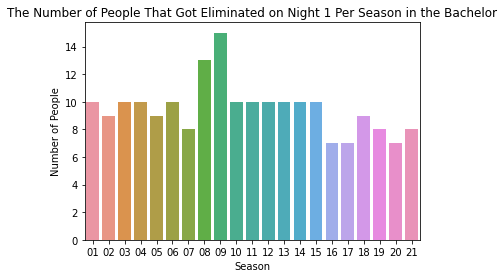

In [98]:
sns.barplot(x = num_of_eliminated_b.index, y = num_of_eliminated_b.bachelor, data = num_of_eliminated_b)
plt.title('The Number of People That Got Eliminated on Night 1 Per Season in the Bachelor')
plt.xlabel('Season')
plt.ylabel('Number of People')

In [99]:
num_of_eliminated_bt = bachelorette.loc[(bachelorette['ELIMINATION-1']== 'E'),['SEASON','ELIMINATION-1']]
num_of_eliminated_bt = num_of_eliminated_bt.groupby('SEASON').count()
num_of_eliminated_bt = num_of_eliminated_bt.rename(columns = {'ELIMINATION-1':'bachelorette'})

Text(0, 0.5, 'Number of People')

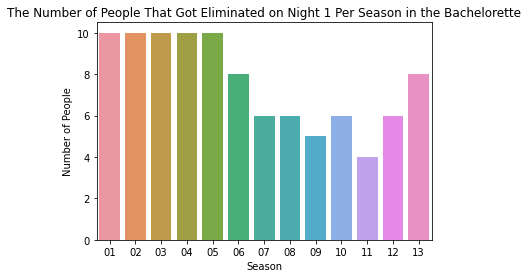

In [100]:
sns.barplot(x = num_of_eliminated_bt.index, y = num_of_eliminated_bt.bachelorette, data = num_of_eliminated_bt)
plt.title('The Number of People That Got Eliminated on Night 1 Per Season in the Bachelorette')
plt.xlabel('Season')
plt.ylabel('Number of People')

In [113]:
#concatenated = pd.concat([num_of_eliminated_b.assign(dataset='set1'), num_of_eliminated_bt.assign(dataset='set2')])

data = [num_of_eliminated_b["bachelor"], num_of_eliminated_bt["bachelorette"]]
#headers = ["bachlor", "bachelorette"]

df3 = pd.concat(data, axis=1)
df3['bachelorette'] = df3['bachelorette'].fillna(0)

df3.index
#df3[['SEASON', 'bachelor', 'bachelorette']].plot(x='SEASOM', kind='bar')
#sns.barplot(x = df3.index, y = df3['bachelor', 'bachelorette'], data = df3)
#sns.barplot(x = df3.index, y = df3.bachelor, data = df3)
#df3.plot(x= df3.index, y=["bachelor","bachelorette"], kind="bar")
#graph =pd.DataFrame(df3,columns=["SEASON","bachelor","bachelorette"])
#graph.plot(x= 'SEASON', y=["bachelor", "bachelorette"], kind="bar")
#plt.show()
#sns.barplot(x = df3.index, y = ["bachelor", "bachelorette"], data= df3)


Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object', name='SEASON')

In [ ]:
# to combine the datasets https://www.kite.com/python/answers/how-to-create-a-pandas-dataframe-from-columns-in-other-dataframes-in-python


In [105]:
#how many seasons did the person who got the first impresion rose won the whole thing
# when did the person that got the first rose get eliminated using scatter point (the x is the person/season and y = week of elimination)

<ipython-input-38-6f9d199c0226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bachelor['total-r'] = 0
<ipython-input-38-6f9d199c0226>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bachelor['total-r'][index] = bachelor['total-r'][index] + 1
/Users/elainakreher/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Text(0, 0.5, 'Number of Roses the Contestant Recieved')

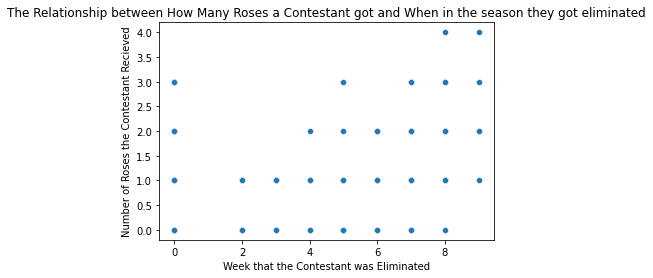

In [38]:
bachelor['total-r'] = 0
for index, person in bachelor.iterrows():
    #print(person)
    for e in range(1,10):
         if person['ELIMINATION-' + str(e)] == 'R' or person['ELIMINATION-' + str(e)] == 'R1':
                bachelor['total-r'][index] = bachelor['total-r'][index] + 1
bachelor['eliminated'] = 0
for index, person in bachelor.iterrows():
    for e in range(2,10):
        if person['ELIMINATION-' + str(e)] == 'E':
             bachelor['eliminated'][index] = e
#bachelor
sns.scatterplot(data=bachelor, x="eliminated", y="total-r")
plt.title('The Relationship between How Many Roses a Contestant got and When in the season they got eliminated')
plt.xlabel('Week that the Contestant was Eliminated')
plt.ylabel('Number of Roses the Contestant Recieved')

In [39]:
impression_rose = bachelor.loc[(bachelor['ELIMINATION-1']== 'R1')]
#impression_rose = impression_rose[impression_rose.isin(['E']).any(axis=1)]
#impression_rose
round_2 = impression_rose.loc[(bachelor['ELIMINATION-2']== 'E'),['CONTESTANT']].count()
round_3 = impression_rose.loc[(bachelor['ELIMINATION-3']== 'E'),['CONTESTANT']].count()
round_4 = impression_rose.loc[(bachelor['ELIMINATION-4']== 'E'),['CONTESTANT']].count()
round_5 = impression_rose.loc[(bachelor['ELIMINATION-5']== 'E'),['CONTESTANT']].count()
round_6 = impression_rose.loc[(bachelor['ELIMINATION-6']== 'E'),['CONTESTANT']].count()
round_7 = impression_rose.loc[(bachelor['ELIMINATION-7']== 'E'),['CONTESTANT']].count()
round_8 = impression_rose.loc[(bachelor['ELIMINATION-8']== 'E'),['CONTESTANT']].count()
round_9 = impression_rose.loc[(bachelor['ELIMINATION-9']== 'E'),['CONTESTANT']].count()
round_10 = impression_rose.loc[(bachelor['ELIMINATION-10']== 'E'),['CONTESTANT']].count()
#
rounds = []
for i in range(1,10):
     rounds.append(impression_rose.loc[(bachelor['ELIMINATION-'+ str(i) ]== 'E'),['CONTESTANT']].count())
rounds   
#sns.scatterplot(data = impression_rose, x = "SEASON", y = "ELIMINATION-2")

[CONTESTANT    0
 dtype: int64,
 CONTESTANT    3
 dtype: int64,
 CONTESTANT    0
 dtype: int64,
 CONTESTANT    1
 dtype: int64,
 CONTESTANT    2
 dtype: int64,
 CONTESTANT    3
 dtype: int64,
 CONTESTANT    2
 dtype: int64,
 CONTESTANT    3
 dtype: int64,
 CONTESTANT    1
 dtype: int64]

In [21]:
bachelor.loc[(bachelor['ELIMINATION-1']== 'R1') & (bachelor['ELIMINATION-10'] == 'W'),['SEASON','CONTESTANT']]

,SEASON,CONTESTANT
352,21,21_VANESSA_G
471,17,17_CATHERINE_G


In [22]:
bachelorette.loc[(bachelorette['ELIMINATION-1']== 'R1') & (bachelorette['ELIMINATION-10'] == 'W'),['SEASON','CONTESTANT']]

,SEASON,CONTESTANT
1,13,13_BRYAN_A
33,12,12_JORDAN_R
191,06,06_ROBERT_M


In [23]:
#which season had the most unscheduled eliminations

Text(0, 0.5, 'Number of Unscheduled Eliminations')

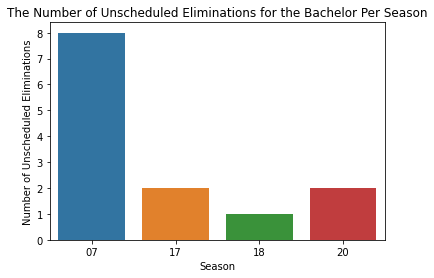

In [44]:
unscheduled_eliminations = bachelor[bachelor.isin(['EU']).any(axis=1)]
unscheduled_eliminations = unscheduled_eliminations.groupby('SEASON').count()
sns.barplot(x = unscheduled_eliminations.index, y = unscheduled_eliminations.CONTESTANT, data = bachelor)
plt.title('The Number of Unscheduled Eliminations for the Bachelor Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Unscheduled Eliminations')

Text(0, 0.5, 'Number of Unscheduled Eliminations')

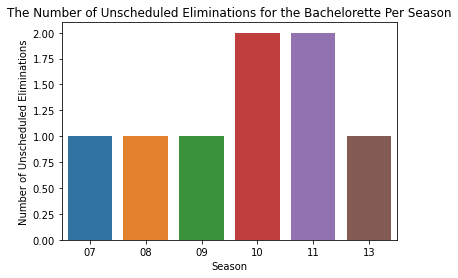

In [42]:
unscheduled_eliminations = bachelorette[bachelorette.isin(['EU']).any(axis=1)]
unscheduled_eliminations = unscheduled_eliminations.groupby('SEASON').count()
sns.barplot(x = unscheduled_eliminations.index, y = unscheduled_eliminations.CONTESTANT, data = bachelorette)
plt.title('The Number of Unscheduled Eliminations for the Bachelorette Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Unscheduled Eliminations')

In [26]:
# got isin from https://www.statology.org/pandas-find-value-any-column/